In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

# Loading Argo netCDF file

In [ ]:
filepath = '/content/5906248_Sprof.nc'

data = xr.open_dataset(filepath)
display(data)

<xarray.Dataset>
Dimensions:                          (N_PROF: 23, N_PARAM: 8, N_CALIB: 1,
                                      N_LEVELS: 559)
Dimensions without coordinates: N_PROF, N_PARAM, N_CALIB, N_LEVELS
Data variables: (12/86)
    DATA_TYPE                        object ...
    FORMAT_VERSION                   object ...
    HANDBOOK_VERSION                 object ...
    REFERENCE_DATE_TIME              object ...
    DATE_CREATION                    object ...
    DATE_UPDATE                      object ...
    ...                               ...
    NITRATE                          (N_PROF, N_LEVELS) float32 ...
    NITRATE_QC                       (N_PROF, N_LEVELS) object ...
    NITRATE_dPRES                    (N_PROF, N_LEVELS) float32 ...
    NITRATE_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    NITRATE_ADJUSTED_QC              (N_PROF, N_LEVELS) object ...
    NITRATE_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
Attributes:
    title:                Argo float vertical profile
    institution:          AOML
    source:               Argo float
    history:              2023-06-30T02:40:35Z creation (software version 1.1...
    references:           http://www.argodatamgt.org/Documentation
    user_manual_version:  1.0
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile
    software_version:     1.15 (version 09.06.2022 for ARGO_simplified_profile)

In [ ]:
pres_first_prof = data['PRES'].values[0,:]
temp_first_prof = data['TEMP'].values[0,:]

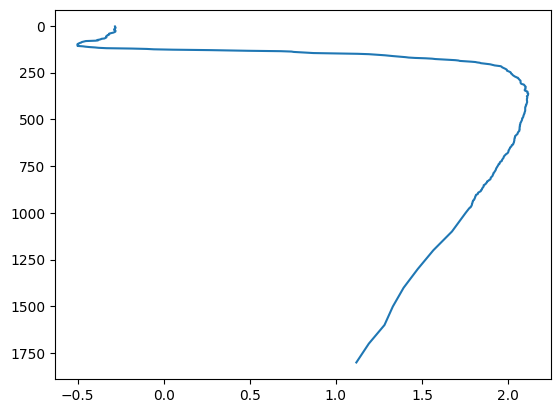

In [ ]:
plt.plot(temp_first_prof,pres_first_prof)
plt.gca().invert_yaxis()

In [ ]:
data['PRES'].attrs['long_name']

'Sea water pressure, equals 0 at sea-level'

# Loading, processing, and plotting NB Palmer
 shipboard CNV file

In [ ]:
filepath = 'dnbp2211_001.cnv'

# Identify header line number (= line_idx - 1)
file_object = open(filepath,'r')
all_lines = file_object.readlines()
file_object.close()
header_names = []
for line_idx, line in enumerate(all_lines):
  if '*END*' in line:
    break
  elif ' name' in line:
    header_names.append(line.split('= ')[1].split(':')[0])
header_names.append('')
# print('First line of data after header:',line_idx, line)

# Extract header names
for line_idx, line in enumerate(all_lines):
  if ' name' in line:
    header_names.append(line.split('= ')[1].split(':')[0])
header_names.append('')

pd.read_csv(filepath,header=None,skiprows=line_idx+1,delim_whitespace=True)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,3.0,2.986,0.6714,28.697590,0.6729,28.699145,7.8876,7.9709,0.3025,97.2691,...,105.930,694.320,16665,1027.1163,1027.1160,33.8013,33.8016,7.93803,1,0.0
1,4.0,3.961,0.6706,28.698075,0.6731,28.700361,7.8880,7.9623,0.3049,97.6027,...,103.870,695.620,16696,1027.1214,1027.1215,33.8021,33.8024,7.93815,27,0.0
2,5.0,4.953,0.6693,28.697519,0.6709,28.699846,7.8909,7.9627,0.3116,97.7276,...,104.170,696.479,16716,1027.1264,1027.1274,33.8022,33.8036,7.93841,19,0.0
3,6.0,5.945,0.6608,28.691212,0.6632,28.693173,7.8883,7.9726,0.3036,97.9193,...,103.450,713.080,17115,1027.1322,1027.1321,33.8027,33.8027,7.94012,40,0.0
4,7.0,6.935,0.6685,28.698019,0.6711,28.700008,7.8871,7.9641,0.2961,97.9622,...,103.960,720.073,17283,1027.1362,1027.1358,33.8026,33.8023,7.93856,30,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2027.0,1998.408,1.3263,30.845606,1.3290,30.847386,4.2602,4.3357,-0.0203,100.1124,...,39.696,3345.650,80297,1037.1768,1037.1759,34.7218,34.7212,7.75619,34,0.0
2025,2028.0,1999.389,1.3256,30.845380,1.3281,30.847227,4.2630,4.3362,-0.0177,100.1098,...,39.665,3348.430,80363,1037.1814,1037.1807,34.7218,34.7213,7.75633,36,0.0
2026,2029.0,2000.371,1.3249,30.845152,1.3273,30.846828,4.2646,4.3354,-0.0198,100.1064,...,40.152,3356.138,80548,1037.1859,1037.1852,34.7217,34.7212,7.75646,33,0.0
2027,2030.0,2001.352,1.3245,30.845188,1.3271,30.846991,4.2660,4.3372,-0.0184,100.1108,...,40.492,3384.184,81221,1037.1905,1037.1897,34.7217,34.7212,7.75654,40,0.0


# Loading, processing, and plotting float EDF file

In [ ]:
filepath = '/content/1122.001.edf.txt'

# Identify header line number (= line_idx - 1)
file_object = open(filepath,'r')
all_lines = file_object.readlines()
for line_idx, line in enumerate(all_lines):
  if line[0] != '$':
    break
print('First line of data after header:',line_idx, line)

# Extract column names
col_names = all_lines[line_idx-1].split()
print('Header column names:',col_names,'\n')

# Load data
data = pd.read_csv(filepath,comment='$',delim_whitespace=True,na_values='*',
                   header=None,names=col_names[2:])
display(data)

First line of data after header: 91      2.30   10.366   34.405   17.786   0.874579   406  1457   168   -0.902169         nan  10.366  26.4249  273.6  284.8   10.333    6.2   32

Header column names: ['$', 'T', 'p', 't', 's', 'O2Phase', 'O2tV', 'fl', 'bb', 'cd', 'pH-Vrs', 'pH-Vk', 'theta', 'sigma', 'o2sat', '[O2]', 'T63', 'speed', 'n'] 



,p,t,s,O2Phase,O2tV,fl,bb,cd,pH-Vrs,pH-Vk,theta,sigma,o2sat,[O2],T63,speed,n
0,2.3,10.366,34.405,17.786,0.874579,406,1457,168,-0.902169,NaN,10.366,26.4249,273.6,284.8,10.333,6.2,32
1,4.0,10.247,34.407,17.779,0.877397,449,1414,175,-0.901938,NaN,10.247,26.4471,274.3,286.2,10.229,4.5,44
2,6.0,10.171,34.408,17.776,0.879281,582,1473,173,-0.901731,NaN,10.170,26.4610,274.8,287.1,10.159,5.1,39
3,7.9,10.141,34.408,17.784,0.880097,644,1505,172,-0.901716,NaN,10.140,26.4662,274.9,287.1,10.128,5.4,37
4,10.0,10.118,34.409,17.794,0.880719,946,1590,175,-0.901667,NaN,10.117,26.4709,275.1,287.0,10.105,5.9,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,1299.8,3.092,34.401,24.207,1.087143,64,343,219,-0.918275,-0.828354,2.999,27.4070,321.4,177.2,3.089,NaN,1
497,1349.4,3.005,34.424,24.404,1.089901,63,343,220,-0.918504,-0.828408,2.909,27.4336,322.0,174.0,3.002,NaN,1
498,1399.7,2.921,34.451,24.573,1.092556,63,345,221,-0.918678,-0.828381,2.822,27.4629,322.5,171.4,2.919,NaN,1
499,1449.3,2.857,34.471,24.694,1.094618,65,342,225,-0.918760,-0.828328,2.755,27.4849,322.9,169.6,2.854,NaN,1


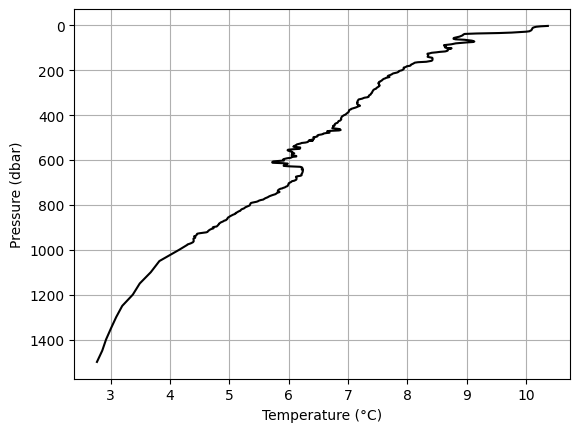

In [ ]:
plt.plot(data['t'],data['p'],color='k')
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel('Temperature (°C)')
plt.ylabel('Pressure (dbar)');